# Price Change, May 19, 2021

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [52]:
df = pd.read_csv("./data/prices_may_19_2021.csv")
df.head()

,minute,blockchain,contract_address,decimals,symbol,price
0,2021-05-19 00:00:00.000 UTC,NaN,NaN,NaN,ADA,2.01
1,2021-05-19 00:00:00.000 UTC,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,18.0,LINK,42.66
2,2021-05-19 00:00:00.000 UTC,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,18.0,ADA,2.01
3,2021-05-19 00:00:00.000 UTC,arbitrum,0xf97f4df75117a78c1a5a0dbb814af92458539fb4,18.0,LINK,42.66
4,2021-05-19 00:00:00.000 UTC,NaN,NaN,NaN,BTC,43019.29


In [53]:
df.loc[df.groupby('symbol')['price'].idxmax().values]

,minute,blockchain,contract_address,decimals,symbol,price
1477,2021-05-19 00:30:00.000 UTC,fantom,0x6a07a792ab2965c72a5b8088d3a069a7ac3a993b,18.0,AAVE,648.21000
722,2021-05-19 00:15:00.000 UTC,NaN,NaN,NaN,ADA,2.02000
1461,2021-05-19 00:30:00.000 UTC,NaN,NaN,NaN,AVAX,38.43000
725,2021-05-19 00:15:00.000 UTC,NaN,NaN,NaN,BNB,515.88000
721,2021-05-19 00:15:00.000 UTC,NaN,NaN,NaN,BTC,43523.82000
1443,2021-05-19 00:30:00.000 UTC,ethereum,0xc00e94cb662c3520282e6f5717214004a7f26888,18.0,COMP,672.66000
508,2021-05-19 00:10:00.000 UTC,bnb,0x4206931337dc273a630d328da6441786bfad668f,8.0,DOGE,0.47824
754,2021-05-19 00:15:00.000 UTC,NaN,NaN,NaN,ETH,3431.84000
750,2021-05-19 00:15:00.000 UTC,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,18.0,LINK,43.40000
731,2021-05-19 00:15:00.000 UTC,NaN,NaN,NaN,LTC,298.93000


In [72]:
dfc = df[(df.minute >= '2021-05-19 02:30:00') & (df.minute < '2021-05-20')].groupby(['minute', 'symbol'], as_index=False)['price'].median().copy()
dfc['price_change'] = dfc.groupby(['symbol'], group_keys=False)['price'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))


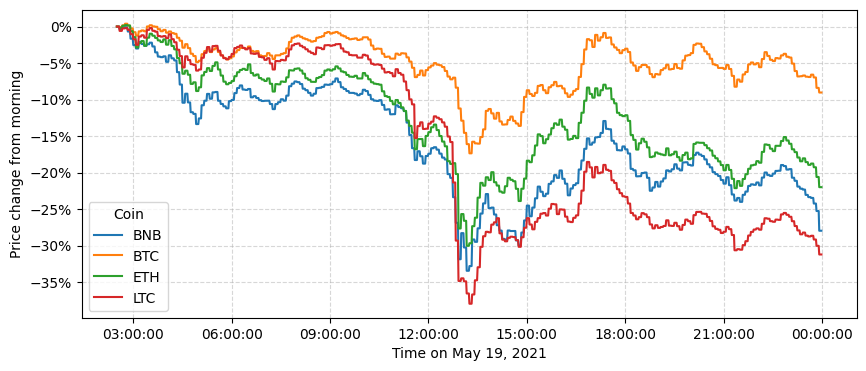

In [80]:
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.lineplot(data=dfc[dfc.symbol.isin(['ETH', 'LTC', 'BTC', 'BNB'])], x=pd.to_datetime(dfc['minute']), y='price_change', hue='symbol', ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.yaxis.set_major_formatter(mticks.PercentFormatter(decimals=0))
ax.grid(linestyle='--', alpha=0.5)
ax.set_xlabel('Time on May 19, 2021')
ax.set_ylabel('Price change from morning')
ax.legend(title='Coin')

In [11]:
df.groupby(['symbol', 'blockchain'])['price'].pct_change()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
97915    0.0
97916    0.0
97917    0.0
97918    NaN
97919    0.0
Name: price, Length: 97920, dtype: float64